In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


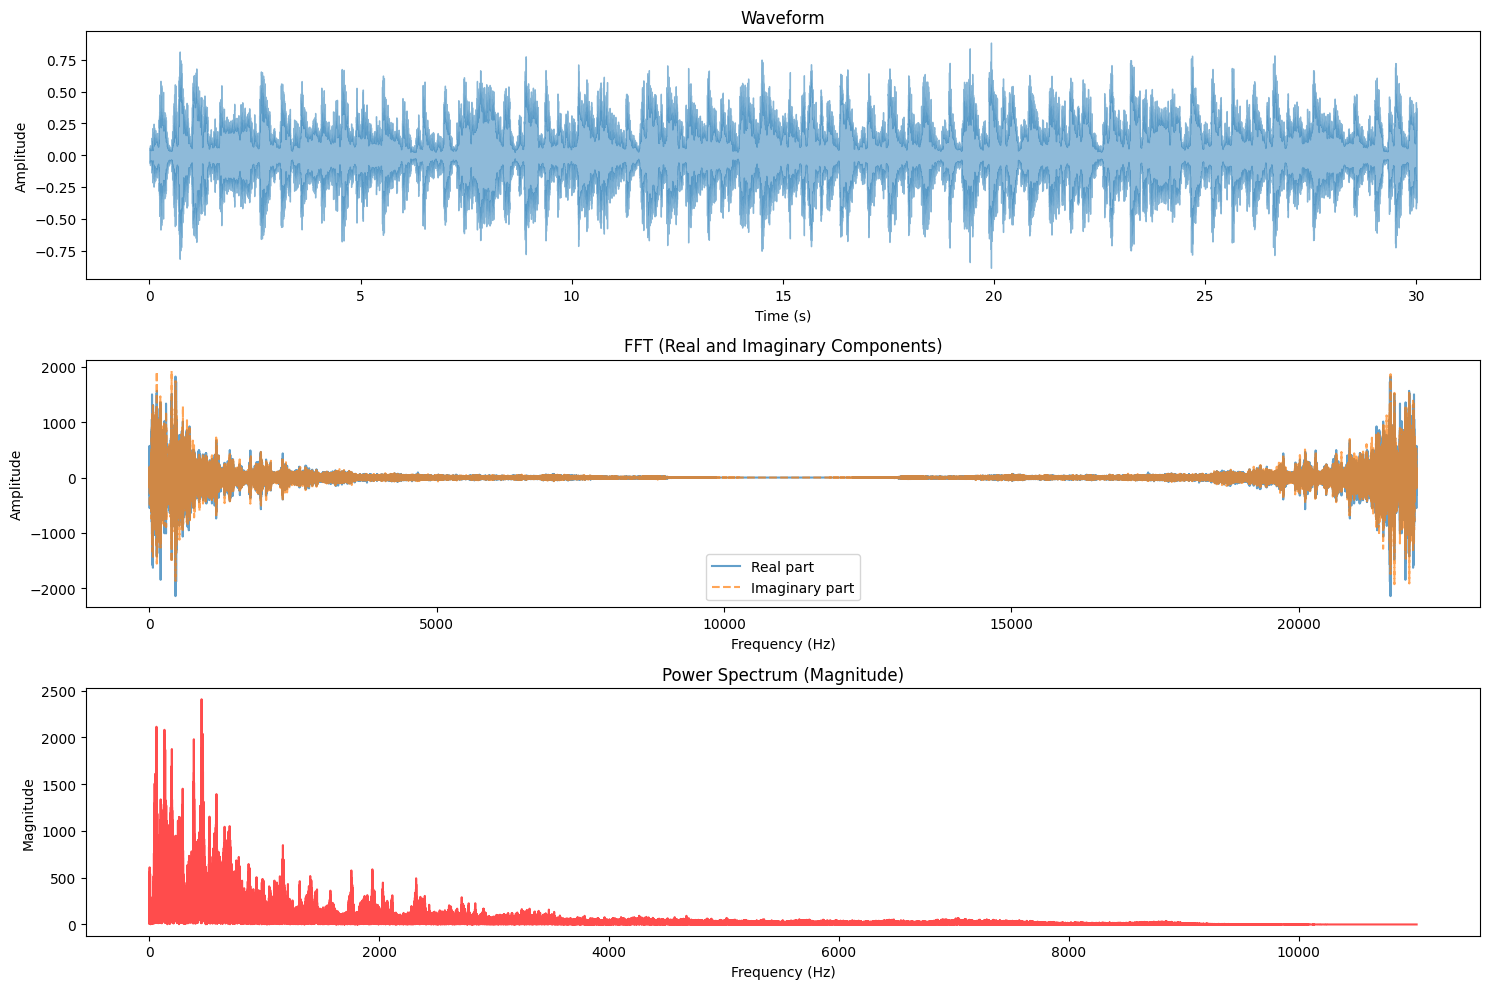

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

FIG_SIZE = (15, 10)

# Load the audio file
file = "/content/drive/MyDrive/Aivle_빅프/blues.00000.wav"
signal, sample_rate = librosa.load(file, sr=22050)

# 1. Waveform visualization
plt.figure(figsize=FIG_SIZE)
plt.subplot(3, 1, 1)
librosa.display.waveshow(signal, sr=sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

# 2. FFT computation
fft = np.fft.fft(signal)

# 3. Spectrum (Magnitude) calculation
spectrum = np.abs(fft)

# 4. Frequency axis creation
f = np.linspace(0, sample_rate, len(spectrum))

# 5. Take half the spectrum and frequency (use only positive frequencies)
left_spectrum = spectrum[:int(len(spectrum) / 2)]
left_f = f[:int(len(spectrum) / 2)]

# FFT visualization (Real and Imaginary parts)
plt.subplot(3, 1, 2)
plt.plot(f, np.real(fft), label="Real part", alpha=0.7)
plt.plot(f, np.imag(fft), label="Imaginary part", alpha=0.7, linestyle="--")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT (Real and Imaginary Components)")
plt.legend()

# Spectrum visualization (Power spectrum)
plt.subplot(3, 1, 3)
plt.plot(left_f, left_spectrum, alpha=0.7, color="r")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Power Spectrum (Magnitude)")

plt.tight_layout()
plt.show()


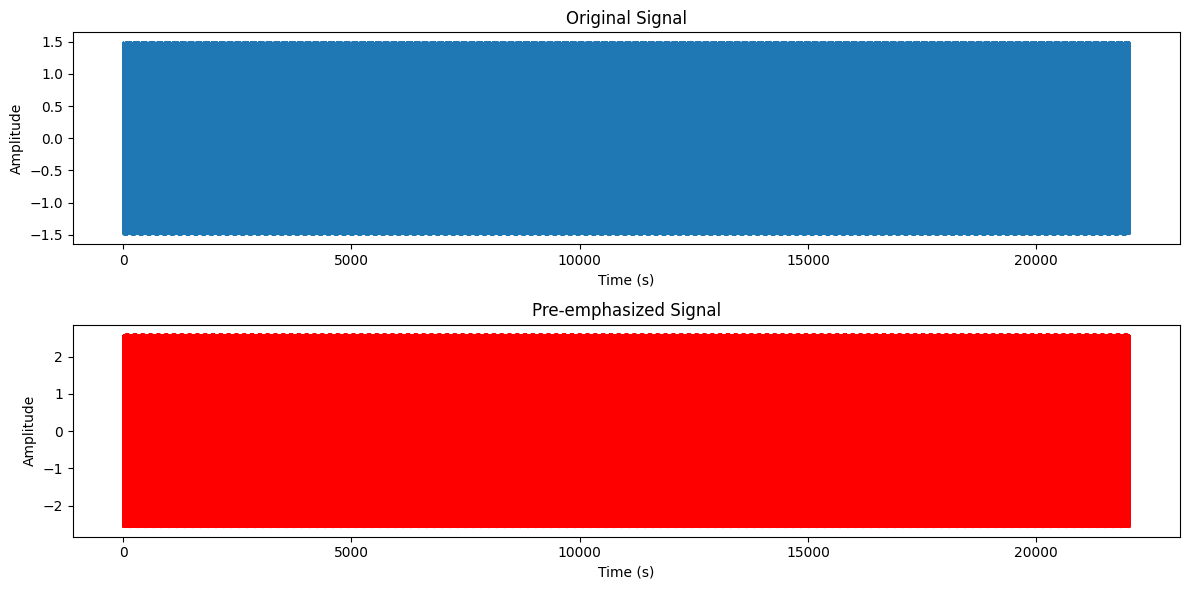

In [ ]:
signal = np.sin(2 * np.pi * 100 * f) + 0.5 * np.sin(2 * np.pi * 2000 * f)  # 저주파 + 고주파 신호

# Pre-emphasis 필터 적용
alpha = 0.97  # 감쇠 계수
pre_emphasized_signal = np.append(signal[0], signal[1:] - alpha * signal[:-1])

# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(f, signal, label="Original Signal")
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(f, pre_emphasized_signal, label="Pre-emphasized Signal", color="r")
plt.title("Pre-emphasized Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

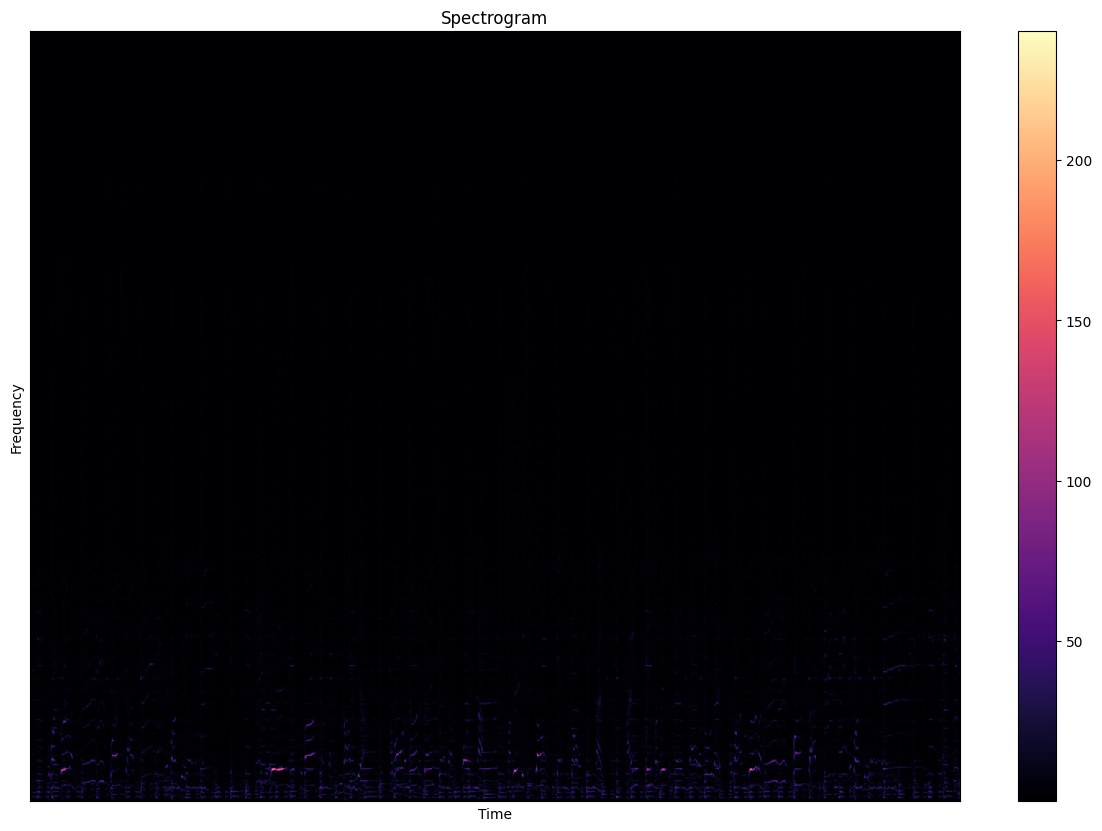

In [ ]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [ ]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

Output hidden; open in https://colab.research.google.com to view.

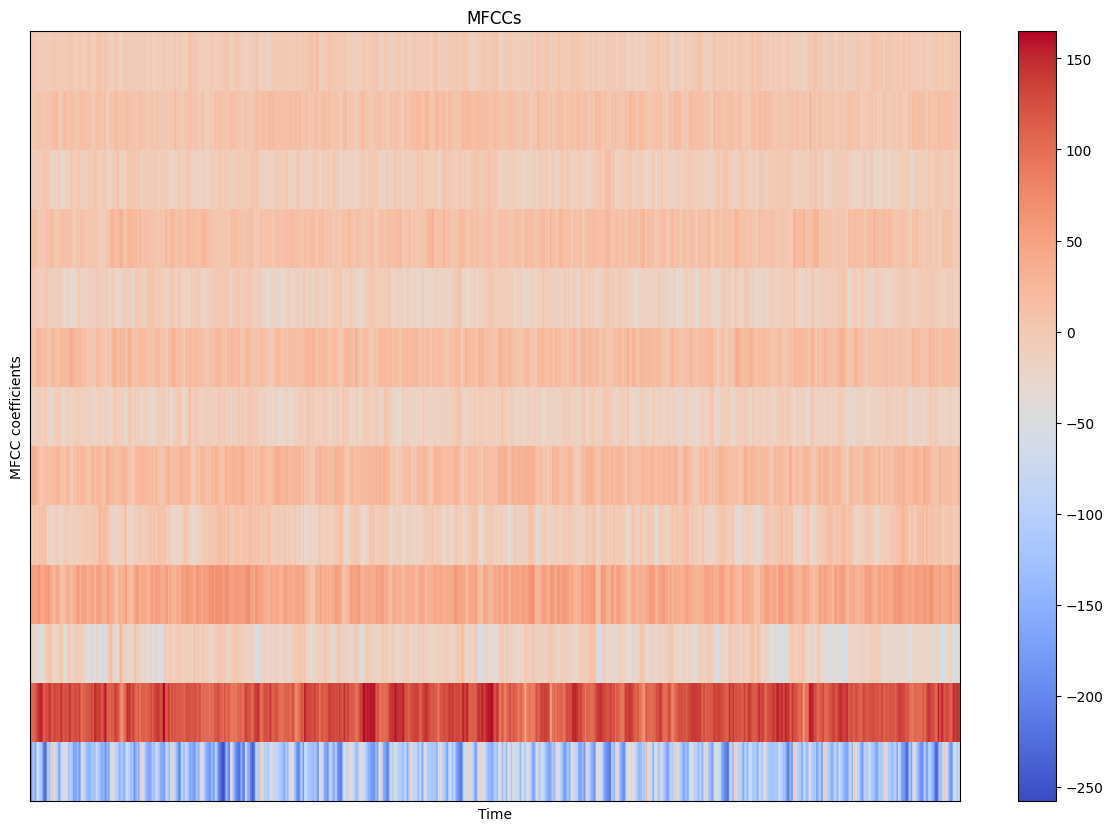

In [ ]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

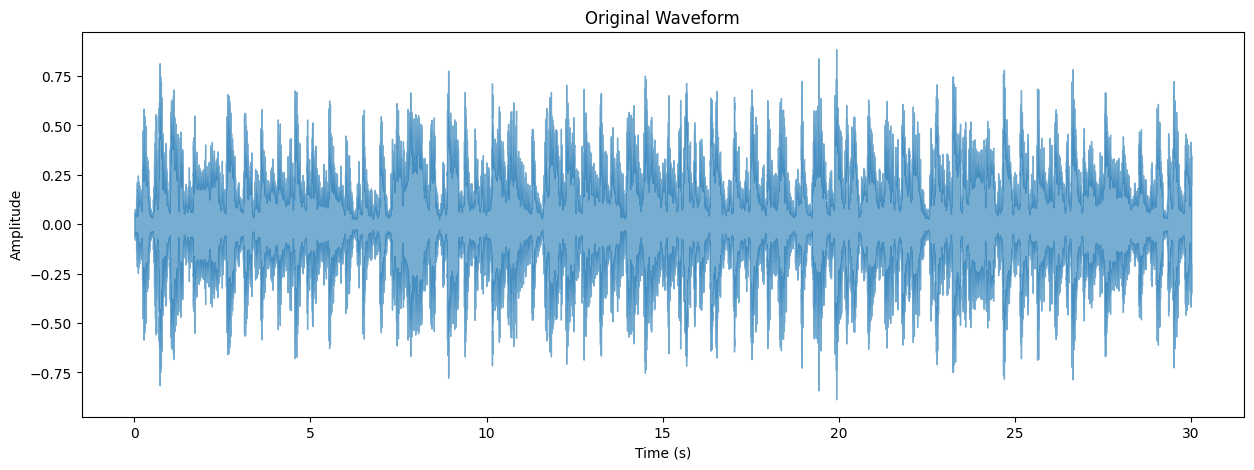

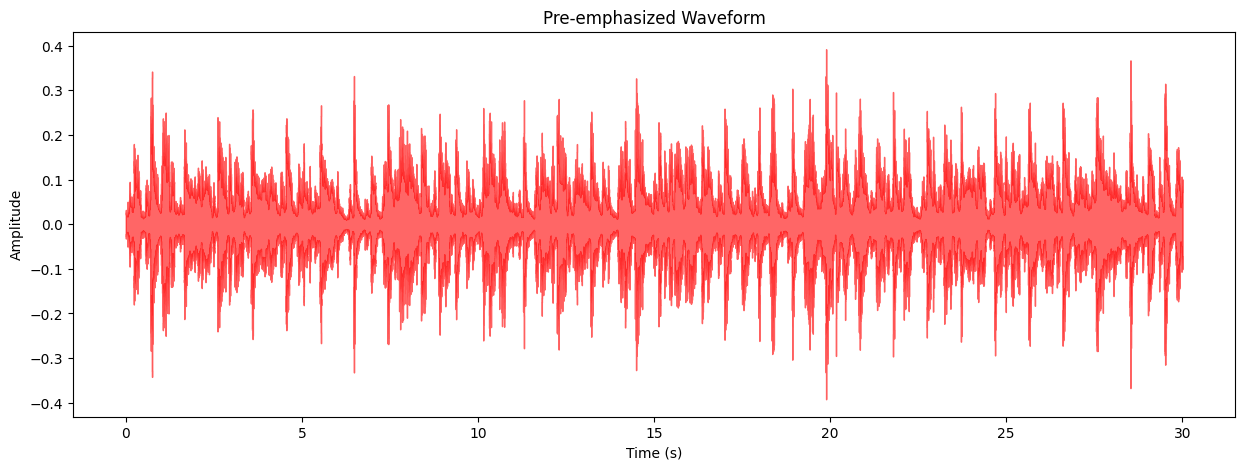

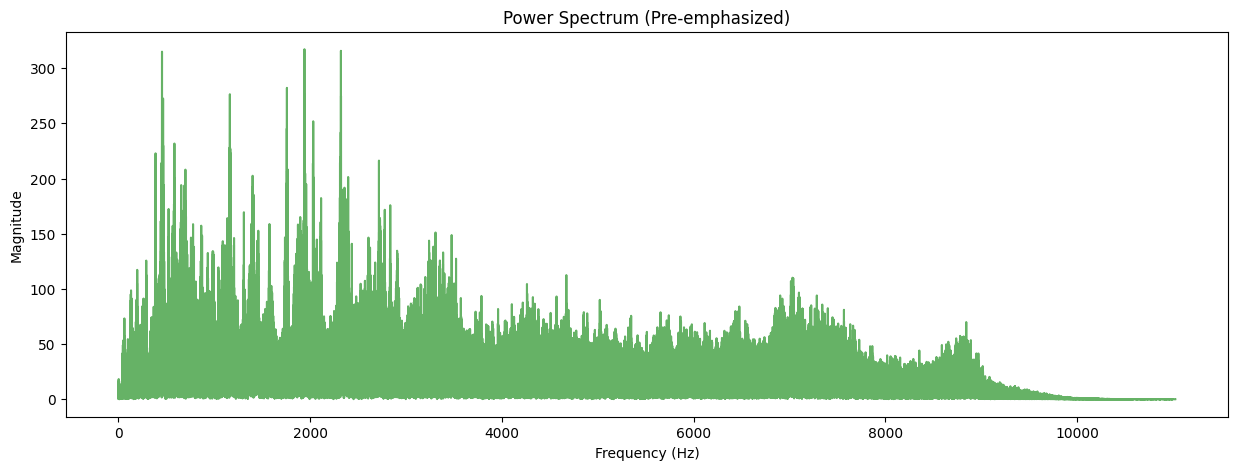

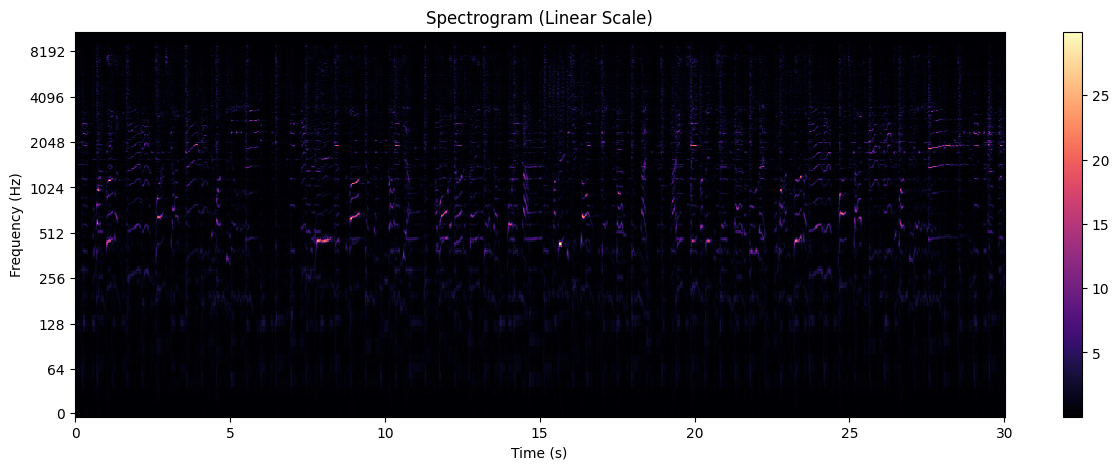

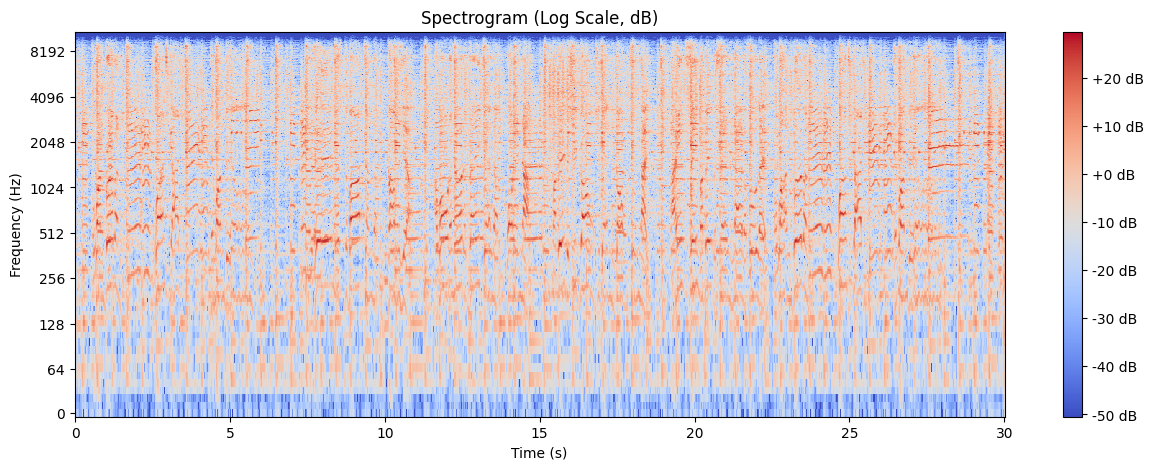

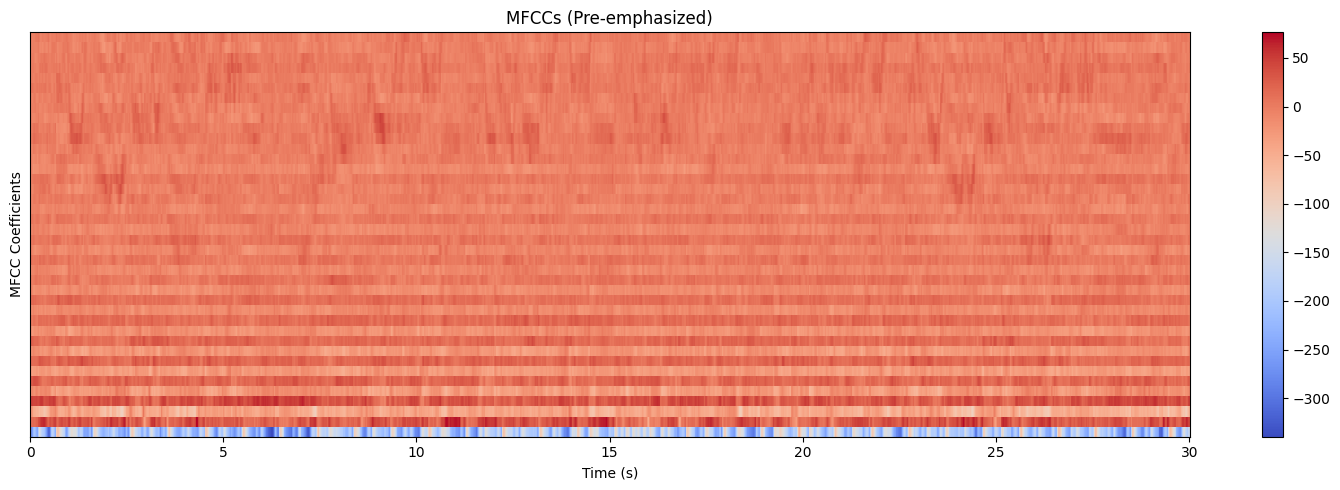

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

FIG_SIZE = (15,5)

file = "/content/drive/MyDrive/Aivle_빅프/blues.00000.wav"
ㅃ
# Load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

# 1. Original Waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sample_rate, alpha=0.6)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original Waveform")

# 2. Apply Pre-emphasis Filter
alpha = 0.97  # Pre-emphasis factor
pre_emphasized_signal = np.append(signal[0], signal[1:] - alpha * signal[:-1])

# Plot Pre-emphasized Waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(pre_emphasized_signal, sr=sample_rate, alpha=0.6, color="r")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Pre-emphasized Waveform")

# 3. FFT -> Power Spectrum
fft = np.fft.fft(pre_emphasized_signal)
spectrum = np.abs(fft)
f = np.linspace(0, sample_rate, len(spectrum))
left_spectrum = spectrum[:len(spectrum)//2]
left_f = f[:len(spectrum)//2]

# Plot Power Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.6, color="g")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Power Spectrum (Pre-emphasized)")

# 4. STFT -> Spectrogram
hop_length = 512  # Number of samples per frame
n_fft = 2048  # FFT window size

# Perform STFT
stft = librosa.stft(pre_emphasized_signal, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)

# Plot Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length, x_axis="time", y_axis="log")
plt.colorbar()
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram (Linear Scale)")

# 5. Logarithmic Spectrogram
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# Plot Logarithmic Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram (Log Scale, dB)")

# 6. MFCCs
MFCCs = librosa.feature.mfcc(y=pre_emphasized_signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=40)

# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar()
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.title("MFCCs (Pre-emphasized)")

# Show all plots
plt.tight_layout()
plt.show()


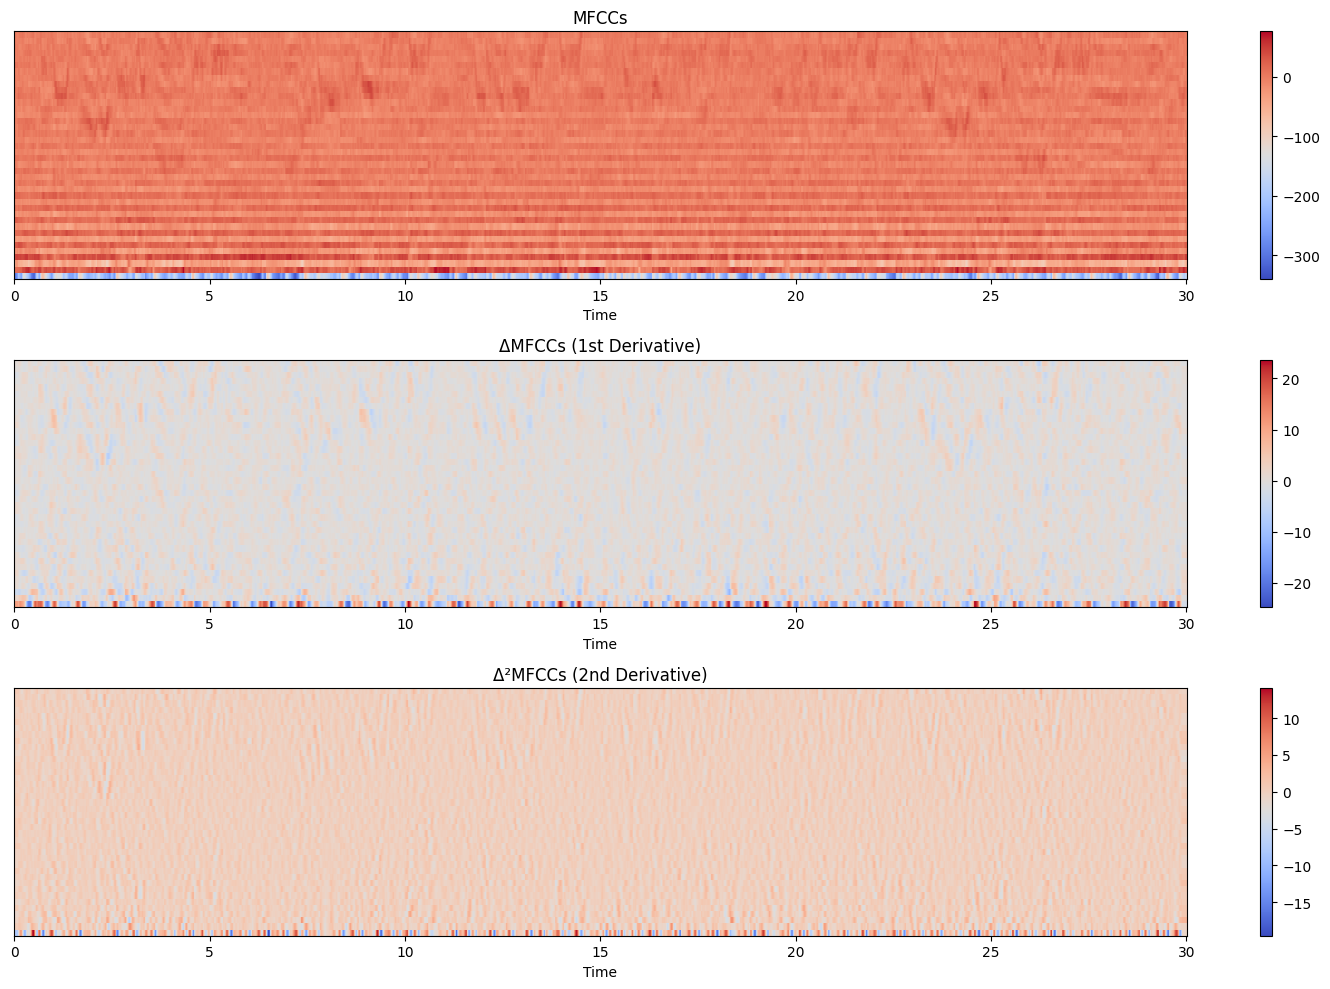

In [ ]:
# Compute 1st and 2nd derivatives (ΔMFCC and Δ²MFCC)
delta_MFCCs = librosa.feature.delta(MFCCs)  # 1st derivative
delta2_MFCCs = librosa.feature.delta(MFCCs, order=2)  # 2nd derivative


# Plot MFCCs, ΔMFCC, and Δ²MFCC
plt.figure(figsize=(15, 10))

# Original MFCCs
plt.subplot(3, 1, 1)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar()
plt.title("MFCCs")

# ΔMFCCs
plt.subplot(3, 1, 2)
librosa.display.specshow(delta_MFCCs, sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar()
plt.title("ΔMFCCs (1st Derivative)")

# Δ²MFCCs
plt.subplot(3, 1, 3)
librosa.display.specshow(delta2_MFCCs, sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar()
plt.title("Δ²MFCCs (2nd Derivative)")

plt.tight_layout()
plt.show()

MFCCs shape: (40, 1293)
ΔMFCCs shape: (40, 1293)
Δ²MFCCs shape: (40, 1293)
Combined shape: (120, 1293)
Input vector shape: (1293, 120)


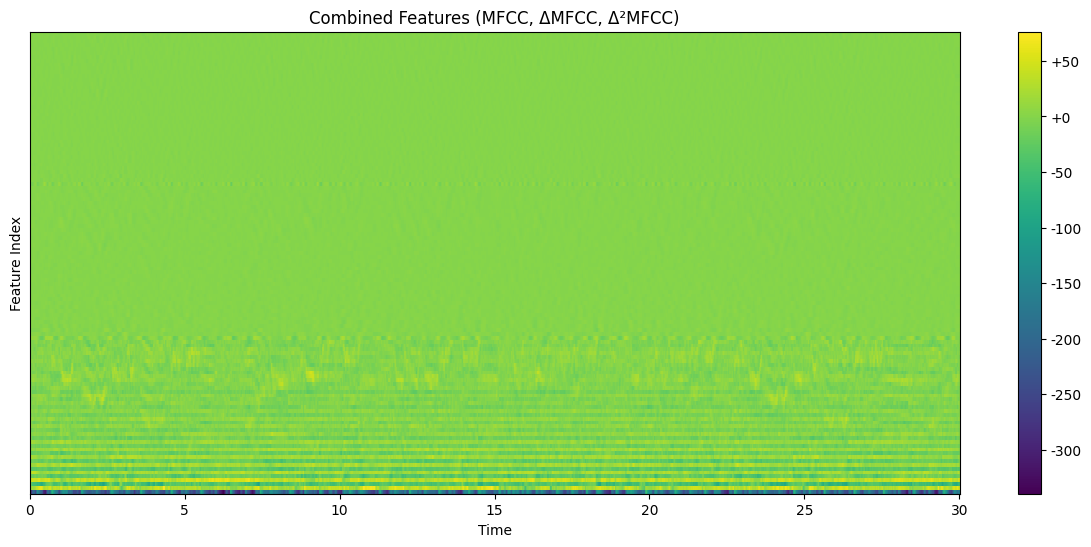

In [ ]:
# Concatenate MFCCs, ΔMFCC, and Δ²MFCC along the feature axis (axis=0)
# MFCCs: (40, T), ΔMFCC: (40, T), Δ²MFCC: (40, T) -> Combined: (120, T)
combined_features = np.concatenate((MFCCs, delta_MFCCs, delta2_MFCCs), axis=0)

# Transpose to make it (T, 120) if needed for certain models (e.g., LSTMs)
input_vector = combined_features.T  # Shape: (T, 120)

# Print shapes to confirm
print(f"MFCCs shape: {MFCCs.shape}")          # (40, T)
print(f"ΔMFCCs shape: {delta_MFCCs.shape}")   # (40, T)
print(f"Δ²MFCCs shape: {delta2_MFCCs.shape}") # (40, T)
print(f"Combined shape: {combined_features.shape}")  # (120, T)
print(f"Input vector shape: {input_vector.shape}")   # (T, 120)

# Optional: Visualize the combined features
plt.figure(figsize=(15, 6))
librosa.display.specshow(combined_features, sr=sample_rate, hop_length=hop_length, x_axis="time", cmap="viridis")
plt.colorbar(format="%+2.0f")
plt.title("Combined Features (MFCC, ΔMFCC, Δ²MFCC)")
plt.xlabel("Time")
plt.ylabel("Feature Index")
plt.show()

# 최종 전처리 코드

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

FIG_SIZE = (15, 10)

file = "/content/drive/MyDrive/Aivle_빅프/blues.00000.wav"

In [ ]:
# input vector의 1챠원 벡터(T)를 128에 맞추기 위해 각종 파라미터간의 수식을 관계를 통해 계산하는 부분
import librosa
import numpy as np

# 설정
sr = 22050  # 샘플링 주파수
hop_length = 1028  # Hop length
n_mfcc = 40  # MFCC 계수
T_target = 128  # 원하는 프레임 수

# L 계산
L = hop_length * (T_target - 1) + 2048  # 임의의 n_fft 값을 사용
print(f"Signal length (L): {L}")

# 오디오 신호 생성
signal = np.random.randn(L)  # 더미 신호 생성

# MFCC 계산 (n_fft 값 변경)
for n_fft in [1024, 2048, 4096]:
    MFCCs = librosa.feature.mfcc(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc)
    print(f"n_fft: {n_fft}, MFCC shape: {MFCCs.shape}")


Signal length (L): 132604
n_fft: 1024, MFCC shape: (40, 129)
n_fft: 2048, MFCC shape: (40, 129)
n_fft: 4096, MFCC shape: (40, 129)


In [ ]:
def prep_audio_for_plot(file_path, sr, alpha, n_fft, hop_length, n_mfcc):
    file = file_path
    signal, sr = librosa.load(file, sr=sr)

    alpha = alpha
    pre_emphasized_signal = np.append(signal[0], signal[1:] - alpha * signal[:-1])

    MFCCs = librosa.feature.mfcc(
    y=pre_emphasized_signal,
    sr=sr,
    n_fft=n_fft,
    hop_length=hop_length,
    n_mfcc=n_mfcc,
    window='hamming')  # Apply Hamming window

    delta_MFCCs = librosa.feature.delta(MFCCs)

    delta2_MFCCs = librosa.feature.delta(MFCCs, order=2)

    combined_features = np.concatenate((MFCCs, delta_MFCCs, delta2_MFCCs), axis=0)

    input_vector = combined_features.T

    # Print final shape
    print(f"MFCCs shape: {MFCCs.shape}")          # (40, T)
    print(f"Delta MFCCs shape: {delta_MFCCs.shape}")  # (40, T)
    print(f"Delta² MFCCs shape: {delta2_MFCCs.shape}")  # (40, T)
    print(f"Combined shape: {combined_features.shape}")  # (120, T)
    print(f"Input vector shape: {input_vector.shape}")  # (T, 120)

    # Original MFCCs
    plt.figure(figsize = (15,5))
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length, x_axis="time")
    plt.colorbar()
    plt.title("MFCCs")
    plt.show()
    # ΔMFCCs
    plt.figure(figsize = (15,5))
    librosa.display.specshow(delta_MFCCs, sr=sample_rate, hop_length=hop_length, x_axis="time")
    plt.colorbar()
    plt.title("ΔMFCCs (1st Derivative)")
    plt.show()
    # Δ²MFCCs
    plt.figure(figsize = (15,5))
    librosa.display.specshow(delta2_MFCCs, sr=sample_rate, hop_length=hop_length, x_axis="time")
    plt.colorbar()
    plt.title("Δ²MFCCs (2nd Derivative)")

    # plt.tight_layout()
    plt.show()

    return input_vector


In [ ]:
def prep_audio(file_path, sr, alpha, n_fft, hop_length, n_mfcc):
    file = file_path
    signal, sr = librosa.load(file, sr=sr)

    alpha = alpha
    pre_emphasized_signal = np.append(signal[0], signal[1:] - alpha * signal[:-1])

    MFCCs = librosa.feature.mfcc(
    y=pre_emphasized_signal,
    sr=sr,
    n_fft=n_fft,
    hop_length=hop_length,
    n_mfcc=n_mfcc,
    window='hamming')  # Apply Hamming window

    delta_MFCCs = librosa.feature.delta(MFCCs)

    delta2_MFCCs = librosa.feature.delta(MFCCs, order=2)

    combined_features = np.concatenate((MFCCs, delta_MFCCs, delta2_MFCCs), axis=0)

    input_vector = combined_features.T

    print(f"Input vector shape: {input_vector.shape}")  # (T, 120)

    return input_vector


Input vector shape: (647, 120)
MFCCs shape: (40, 647)
Delta MFCCs shape: (40, 647)
Delta² MFCCs shape: (40, 647)
Combined shape: (120, 647)
Input vector shape: (647, 120)


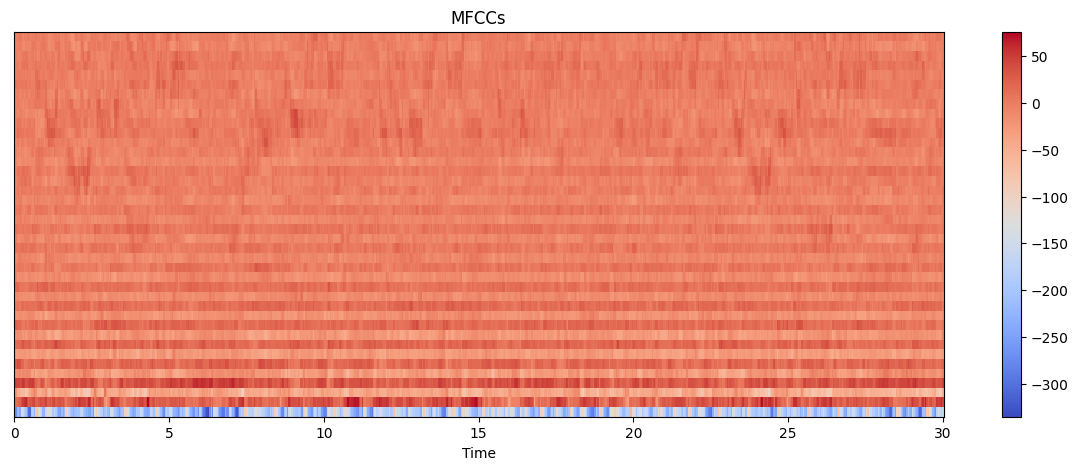

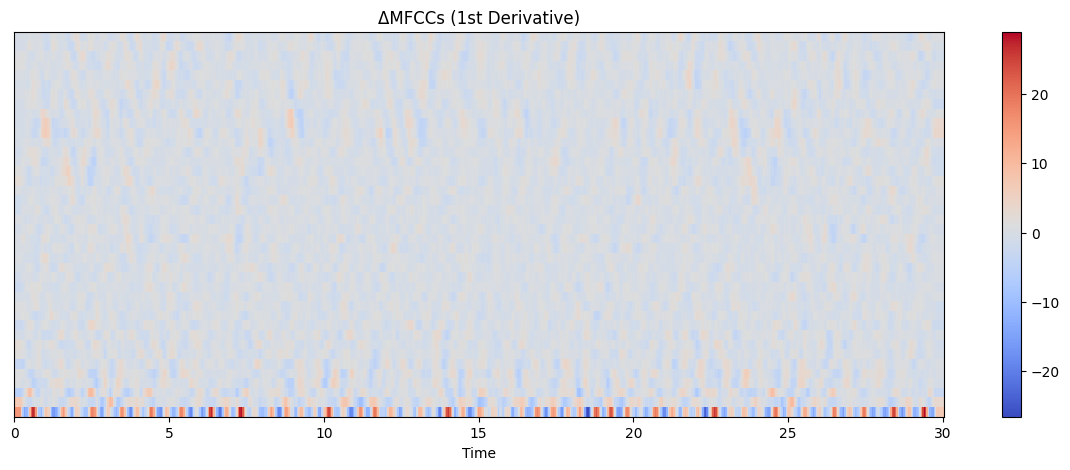

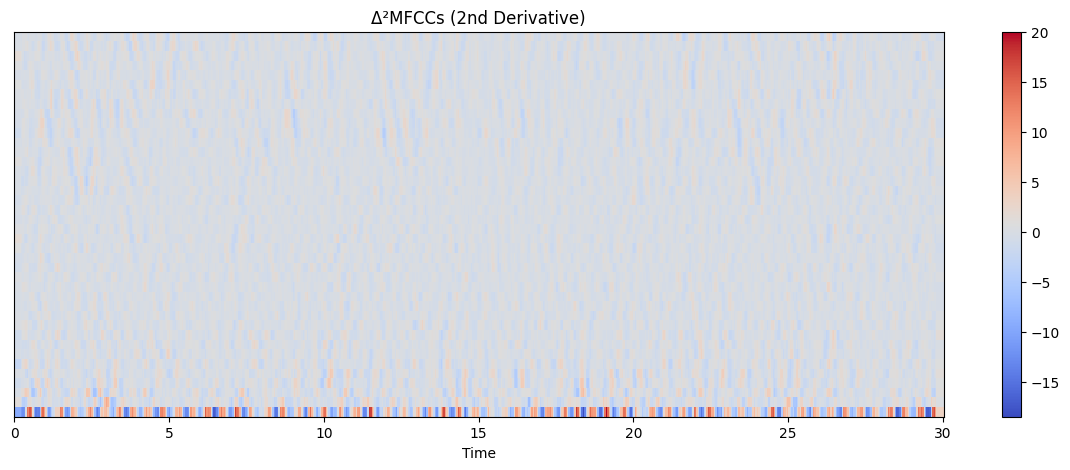

array([[-3.1897025e+02,  1.0439360e+01, -3.5620605e+01, ...,
         1.5671337e+00, -8.8992693e-02, -2.4608339e-01],
       [-2.7091696e+02,  1.1624920e+01, -2.4835705e+01, ...,
         1.5671337e+00, -8.8992693e-02, -2.4608339e-01],
       [-2.1413646e+02,  1.6311617e+01, -4.4916985e+01, ...,
         1.5671337e+00, -8.8992693e-02, -2.4608339e-01],
       ...,
       [-1.5967128e+02,  4.9588074e+01, -8.6347473e+01, ...,
         5.8605289e-01,  2.9062435e-01, -9.5766497e-01],
       [-1.8460504e+02,  5.9853188e+01, -7.7512619e+01, ...,
         5.8605289e-01,  2.9062435e-01, -9.5766497e-01],
       [-1.6015915e+02,  4.3631901e+01, -5.1351063e+01, ...,
         5.8605289e-01,  2.9062435e-01, -9.5766497e-01]], dtype=float32)

In [ ]:
file = "/content/drive/MyDrive/Aivle_빅프/blues.00000.wav"

sr = 22050
alpha = 0.97
n_fft = 2048
hop_length = 1024
n_mfcc = 40

prep_audio(file, sr, alpha, n_fft, hop_length, n_mfcc)

prep_audio_for_plot(file, sr, alpha, n_fft, hop_length, n_mfcc)

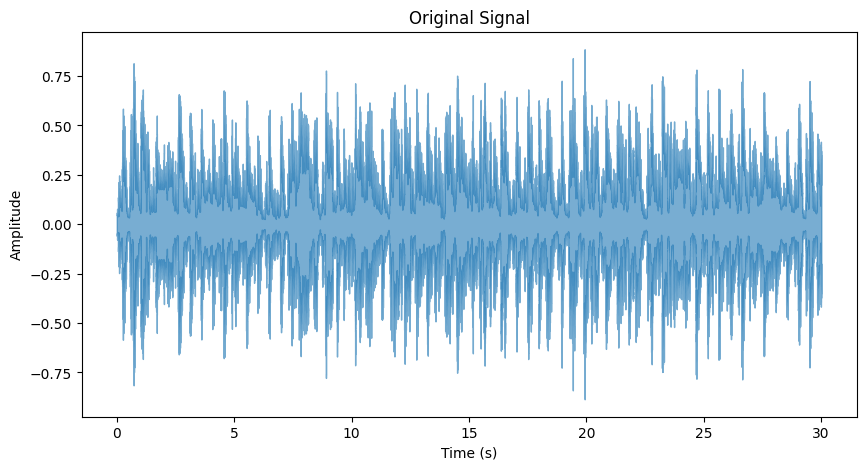

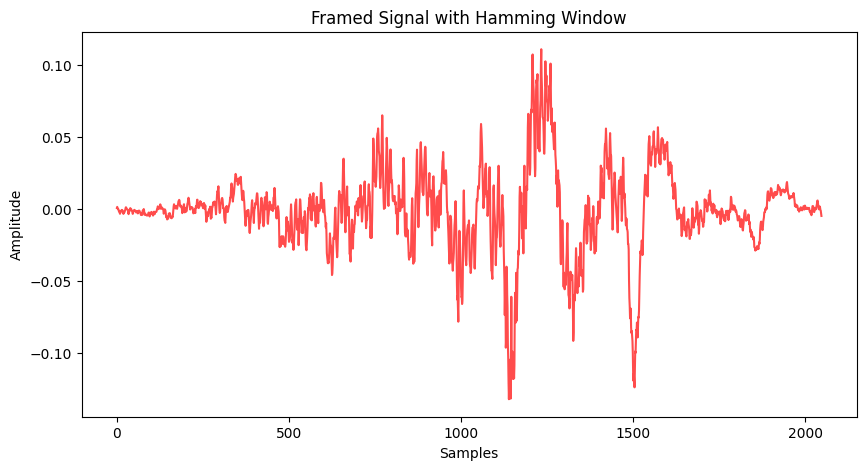

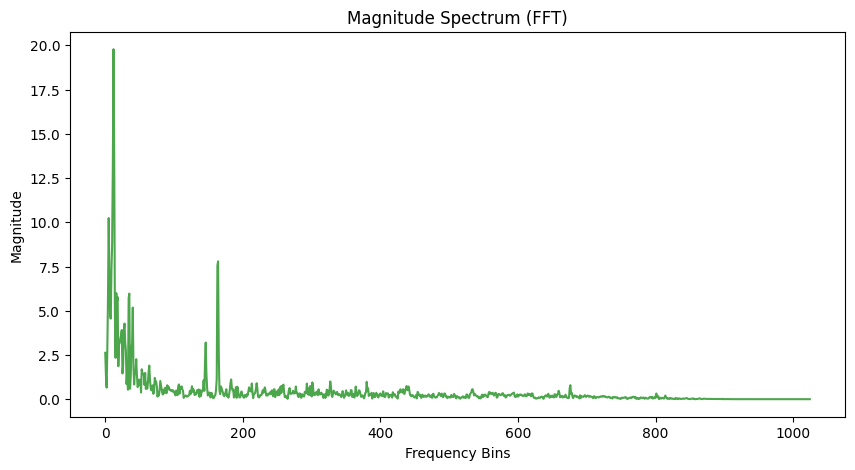

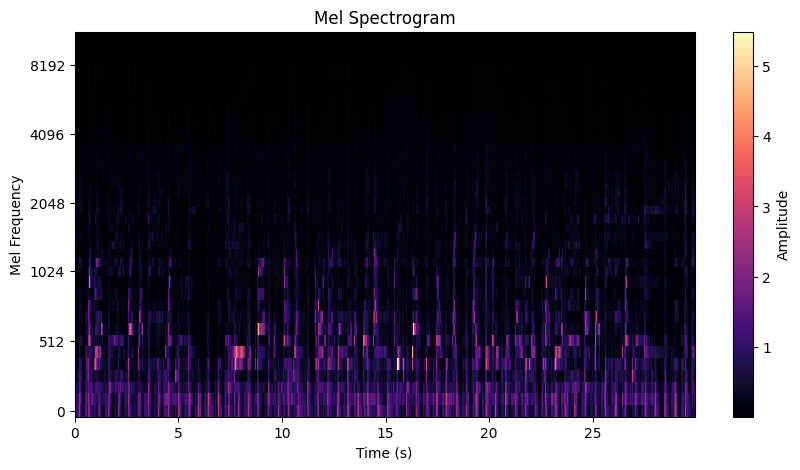

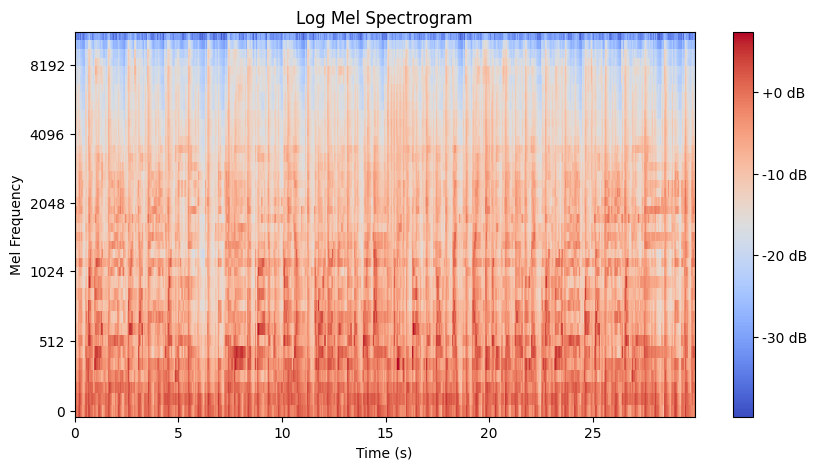

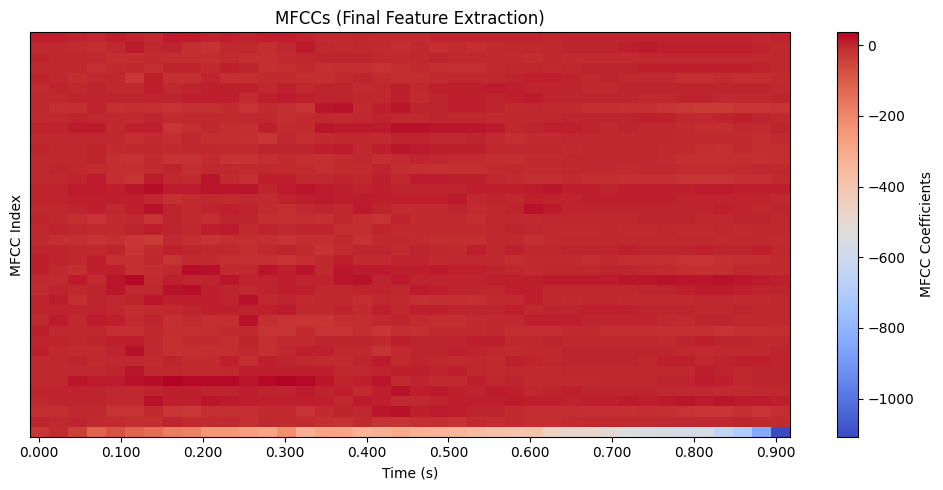

In [4]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Set figure size
FIG_SIZE = (10, 5)

# Load audio file
file = "/content/drive/MyDrive/Aivle_빅프/blues.00000.wav"
signal, sample_rate = librosa.load(file, sr=22050)

# 1️⃣ 프레임 분할 (Framing): 신호를 작은 구간(프레임)으로 나눔
frame_length = 2048  # 2048개 샘플씩 자름
hop_length = 512  # 프레임 간 오버랩

frames = librosa.util.frame(signal, frame_length=frame_length, hop_length=hop_length).T

# 2️⃣ Hamming 윈도우 적용: 경계 효과를 줄여 왜곡 감소
hamming_window = np.hamming(frame_length)
windowed_frames = frames * hamming_window

# 3️⃣ 푸리에 변환 (FFT): 시간 도메인을 주파수 도메인으로 변환
fft_frames = np.fft.rfft(windowed_frames, axis=1)
magnitude_spectrum = np.abs(fft_frames)

# 4️⃣ Mel 필터 적용: 주파수를 Mel-Scale로 변환하여 청각 특성 반영
mel_filterbank = librosa.filters.mel(sr=sample_rate, n_fft=frame_length, n_mels=40)
mel_spectrum = np.dot(magnitude_spectrum, mel_filterbank.T)

# 5️⃣ 로그 변환 (Log Compression): 값의 크기 차이를 줄여 표현
log_mel_spectrum = librosa.power_to_db(mel_spectrum)

# 6️⃣ DCT 변환: 신호의 중요한 특징을 벡터로 추출 (MFCC)
MFCCs = librosa.feature.mfcc(S=log_mel_spectrum, sr=sample_rate, n_mfcc=40)

# ---- Plotting ----
# 1. 원본 신호
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sample_rate, alpha=0.6)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original Signal")

# 2. 프레임 나누기 & Hamming 윈도우 적용된 신호
plt.figure(figsize=FIG_SIZE)
plt.plot(windowed_frames[0], alpha=0.7, color="r")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Framed Signal with Hamming Window")

# 3. 푸리에 변환 후 주파수 스펙트럼
plt.figure(figsize=FIG_SIZE)
plt.plot(magnitude_spectrum[0], alpha=0.7, color="g")
plt.xlabel("Frequency Bins")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum (FFT)")

# 4. Mel 필터 적용 후 스펙트럼
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(mel_spectrum.T, sr=sample_rate, hop_length=hop_length, x_axis="time", y_axis="mel")
plt.colorbar(label="Amplitude")
plt.xlabel("Time (s)")
plt.ylabel("Mel Frequency")
plt.title("Mel Spectrogram")

# 5. 로그 변환된 Mel 스펙트럼
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_mel_spectrum.T, sr=sample_rate, hop_length=hop_length, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.xlabel("Time (s)")
plt.ylabel("Mel Frequency")
plt.title("Log Mel Spectrogram")

# 6. 최종 MFCC 추출 결과
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar(label="MFCC Coefficients")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Index")
plt.title("MFCCs (Final Feature Extraction)")

plt.tight_layout()
plt.show()
